In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

C:\Users\seolbluewings\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\compat\_optional.py:138: UserWarning: Pandas requires version '2.7.0' or newer of 'numexpr' (version '2.6.9' currently installed).
  warnings.warn(msg, UserWarning)


In [4]:
df = pd.read_csv(r"C:\Users\seolbluewings\Desktop\sample\telco_customer_churn.csv") 

In [5]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


- churn 컬럼이 이탈 여부를 표기하는 컬럼이고
- 대다수 컬럼이 범주형 변수인데 Monthly Charges, Total Charges 컬럼은 연속형 변수 

In [11]:
# TotalCharges 컬럼의 데이터 타입을 numeric으로 변경
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors = 'coerce')
df['TotalCharges'] = df.TotalCharges.fillna(0)

#### 고객의 이탈을 예측하는데 y변수로 사용될 컬럼의 값을 이탈일 경우 1 아닌 경우 0으로 변경

In [9]:
df['Churn'] = df['Churn'].apply(lambda x : 1 if x == 'Yes' else 0)

#### Kaplan-Meier Graph

- 가장 먼저 실행할 것은 대략적인 Kaplan-Meier Plot을 그려보는 것

In [12]:
from lifelines import KaplanMeierFitter

In [14]:
duration = df['tenure'] # Time to event data of censored and event data

event_observed = df['Churn'] # churn : 1 censored : 0

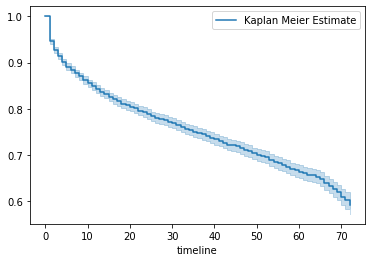

In [16]:
km = KaplanMeierFitter()
km.fit(duration, event_observed, label = 'Kaplan Meier Estimate')
km.plot()

#### 고객의 스트리밍 서비스 구독 방식에 따라 이탈 가능성의 차이가 있는지 보고자 한다

In [17]:
df['Contract']

0       Month-to-month
1             One year
2       Month-to-month
3             One year
4       Month-to-month
             ...      
7038          One year
7039          One year
7040    Month-to-month
7041    Month-to-month
7042          Two year
Name: Contract, Length: 7043, dtype: object